In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

## [Click this link](https://github.com/aangelopoulos/conformal-prediction/blob/main/notebooks/imagenet-raps.ipynb) for a version of APS with much-improved practical performance.

In [2]:
data = np.load("data/imagenet/imagenet-resnet152.npz")
example_paths = os.listdir("data/imagenet/examples")
smx = data["smx"]
labels = data["labels"].astype(int)

In [3]:
# Problem setup
n = 1000  # number of calibration points
alpha = 0.1  # 1-alpha is the desired coverage

In [4]:
# Split the softmax scores into calibration and validation sets (save the shuffling)
idx = np.array([1] * n + [0] * (smx.shape[0] - n)) > 0
np.random.shuffle(idx)
cal_smx, val_smx = smx[idx, :], smx[~idx, :]
cal_labels, val_labels = labels[idx], labels[~idx]

### Conformal prediction happens here

In [5]:
# Get scores. calib_X.shape[0] == calib_Y.shape[0] == n
cal_pi = cal_smx.argsort(1)[:, ::-1] # indices des scores triés de manière décroissante pour chaque ligne.
cal_srt = np.take_along_axis(cal_smx, cal_pi, axis=1).cumsum(axis=1) # score cumulée du tri précédent pour chaque ligne 
cal_scores = np.take_along_axis(cal_srt, cal_pi.argsort(axis=1), axis=1)[
    range(n), cal_labels
]
# Get the score quantile
qhat = np.quantile(
    cal_scores, np.ceil((n + 1) * (1 - alpha)) / n, interpolation="higher"
)
# Deploy (output=list of length n, each element is tensor of classes)
val_pi = val_smx.argsort(1)[:, ::-1]
val_srt = np.take_along_axis(val_smx, val_pi, axis=1).cumsum(axis=1)
prediction_sets = np.take_along_axis(val_srt <= qhat, val_pi.argsort(axis=1), axis=1)

In [6]:
# Calculate empirical coverage
empirical_coverage = prediction_sets[
    np.arange(prediction_sets.shape[0]), val_labels
].mean()
print(f"The empirical coverage is: {empirical_coverage}")

The empirical coverage is: 0.8984489795918368


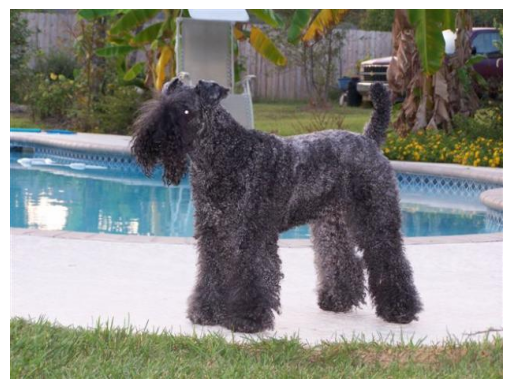

The prediction set is: ['Afghan Hound', 'Kerry Blue Terrier', 'Lakeland Terrier', 'Miniature Schnauzer', 'Giant Schnauzer', 'Standard Schnauzer', 'Irish Water Spaniel', 'Bouvier des Flandres', 'Miniature Poodle']


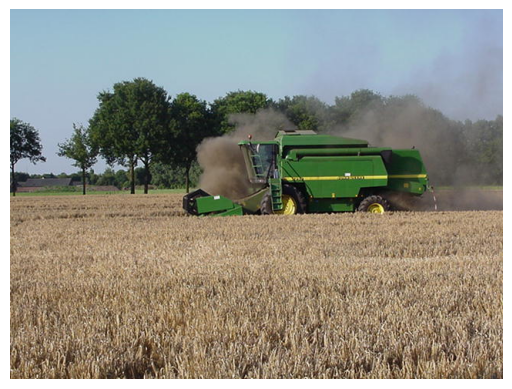

The prediction set is: ['harvester', 'threshing machine', 'tractor']


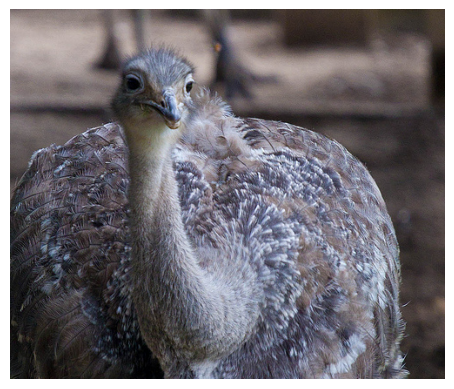

The prediction set is: ['cock', 'hen', 'ostrich', 'vulture', 'peacock', 'black stork', 'crane (bird)', 'bustard', 'llama']


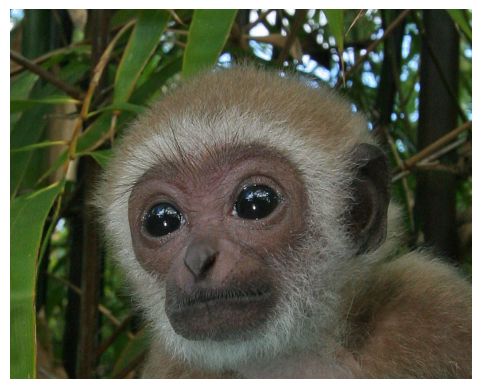

The prediction set is: ['vulture', 'macaw', 'toucan', 'meerkat', 'three-toed sloth', 'orangutan', 'gorilla', 'chimpanzee', 'gibbon', 'siamang', 'guenon', 'patas monkey', 'baboon', 'macaque', 'langur', 'black-and-white colobus', 'proboscis monkey', 'marmoset', 'white-headed capuchin', 'howler monkey', 'titi', "Geoffroy's spider monkey", 'common squirrel monkey', 'ring-tailed lemur', 'indri']


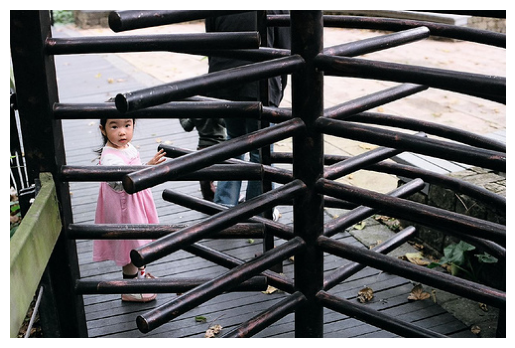

The prediction set is: ['great white shark', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'jay', 'magpie', 'chickadee', 'American dipper', 'bald eagle', 'vulture', 'mud turtle', 'terrapin', 'box turtle', 'Nile crocodile', 'triceratops', 'tarantula', 'peacock', 'quail', 'partridge', 'grey parrot', 'sulphur-crested cockatoo', 'lorikeet', 'hornbill', 'toucan', 'duck', 'red-breasted merganser', 'goose', 'black swan', 'tusker', 'echidna', 'wallaby', 'conch', 'Dungeness crab', 'rock crab', 'red king crab', 'spiny lobster', 'crayfish', 'isopod', 'white stork', 'spoonbill', 'flamingo', 'great egret', 'crane (bird)', 'common gallinule', 'American coot', 'ruddy turnstone', 'dunlin', 'oystercatcher', 'king penguin', 'albatross', 'grey whale', 'killer whale', 'sea lion', 'Norwegian Elkhound', 'Weimaraner', 'Border Terrier', 'Norfolk Terrier', 'Norwich Terrier', 'Airedale Terrier', 'Cairn Terrier', 'West Highland White Terrier', 'Brittany', 'Kuvasz',

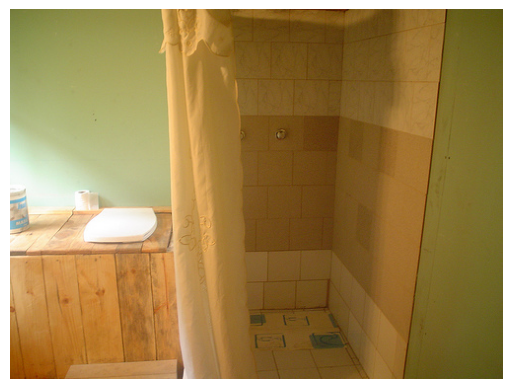

The prediction set is: ['Gila monster', 'Komodo dragon', 'eastern diamondback rattlesnake', 'Maltese', 'Soft-coated Wheaten Terrier', 'Lhasa Apso', 'Samoyed', 'Pomeranian', 'Pembroke Welsh Corgi', 'Toy Poodle', 'tabby cat', 'tiger cat', 'Persian cat', 'Siamese cat', 'Egyptian Mau', 'lynx', 'mongoose', 'cockroach', 'abaya', 'altar', 'apron', 'waste container', 'bakery', 'balloon', 'Band-Aid', 'baluster', 'barber chair', 'bassinet', 'bassoon', 'bath towel', 'bathtub', 'binoculars', 'poke bonnet', 'bookcase', 'bow tie', 'broom', 'bucket', 'butcher shop', 'candle', 'cardigan', 'carton', 'automated teller machine', 'chainsaw', 'chest', 'chiffonier', 'china cabinet', 'Christmas stocking', 'cleaver', 'cliff dwelling', 'cloak', 'coffeemaker', 'cradle', 'crate', 'infant bed', 'crutch', 'desk', 'rotary dial telephone', 'diaper', 'digital clock', 'dining table', 'dishwasher', 'doormat', 'dumbbell', 'electric fan', 'feather boa', 'filing cabinet', 'fire screen sheet', 'flute', 'folding chair', 'fo

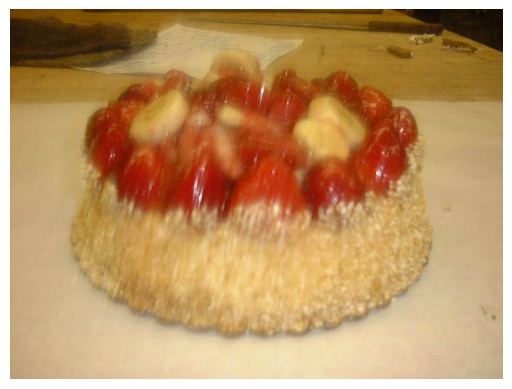

The prediction set is: ['goldfish', 'great white shark', 'tiger shark', 'hammerhead shark', 'electric ray', 'stingray', 'cock', 'hen', 'junco', 'American robin', 'chickadee', 'fire salamander', 'smooth newt', 'newt', 'spotted salamander', 'axolotl', 'tailed frog', 'loggerhead sea turtle', 'leatherback sea turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'frilled-necked lizard', 'alligator lizard', 'Gila monster', 'chameleon', 'Nile crocodile', 'American alligator', 'triceratops', 'worm snake', 'eastern hog-nosed snake', 'kingsnake', 'night snake', 'boa constrictor', 'African rock python', 'Indian cobra', 'sea snake', 'Saharan horned viper', 'eastern diamondback rattlesnake', 'sidewinder', 'trilobite', 'harvestman', 'scorpion', 'barn spider', 'southern black widow', 'tarantula', 'wolf spider', 'tick', 'centipede', 'quail', 'partridge', 'grey parrot', 'macaw', 'hornbill', 'hummingbird', 'toucan', 'duck', 'tusker', 'wombat', 'jellyfish', 'sea anemone', 'brain coral', 'flat

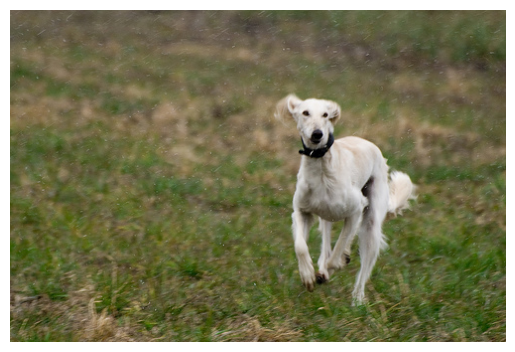

The prediction set is: ['hammerhead shark', 'ostrich', 'vulture', 'boa constrictor', 'Indian cobra', 'ptarmigan', 'peacock', 'grey parrot', 'sulphur-crested cockatoo', 'goose', 'wallaby', 'fiddler crab', 'white stork', 'spoonbill', 'flamingo', 'little blue heron', 'great egret', 'crane (bird)', 'bustard', 'albatross', 'toy terrier', 'Rhodesian Ridgeback', 'Afghan Hound', 'Bloodhound', 'Bluetick Coonhound', 'Treeing Walker Coonhound', 'English foxhound', 'borzoi', 'Irish Wolfhound', 'Italian Greyhound', 'Whippet', 'Ibizan Hound', 'Saluki', 'Scottish Deerhound', 'Weimaraner', 'Staffordshire Bull Terrier', 'American Staffordshire Terrier', 'Bedlington Terrier', 'Border Terrier', 'Kerry Blue Terrier', 'Irish Terrier', 'Wire Fox Terrier', 'Lakeland Terrier', 'Sealyham Terrier', 'Airedale Terrier', 'Dandie Dinmont Terrier', 'Miniature Schnauzer', 'Giant Schnauzer', 'Standard Schnauzer', 'Scottish Terrier', 'Soft-coated Wheaten Terrier', 'West Highland White Terrier', 'Flat-Coated Retriever',

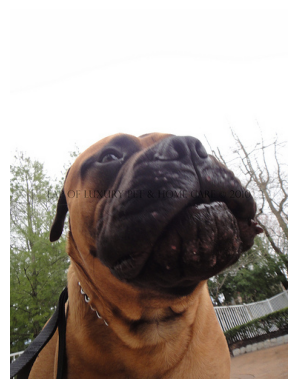

The prediction set is: ['Rhodesian Ridgeback', 'Bloodhound', 'Staffordshire Bull Terrier', 'American Staffordshire Terrier', 'Boston Terrier', 'Soft-coated Wheaten Terrier', 'Malinois', 'Rottweiler', 'Boxer', 'Bullmastiff', 'French Bulldog', 'Great Dane', 'St. Bernard', 'pug', 'Leonberger', 'Griffon Bruxellois', 'bucket', 'muzzle', 'tennis ball']


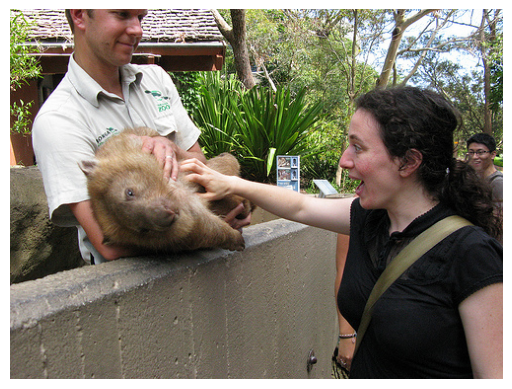

The prediction set is: ['terrapin', 'box turtle', 'green iguana', 'Gila monster', 'Komodo dragon', 'smooth green snake', 'night snake', 'boa constrictor', 'African rock python', 'green mamba', 'eastern diamondback rattlesnake', 'tarantula', 'grey parrot', 'macaw', 'sulphur-crested cockatoo', 'echidna', 'platypus', 'wallaby', 'koala', 'wombat', 'dugong', 'sea lion', 'Irish Wolfhound', 'Irish Terrier', 'Norfolk Terrier', 'Norwich Terrier', 'Lakeland Terrier', 'Airedale Terrier', 'Cairn Terrier', 'Soft-coated Wheaten Terrier', 'Chesapeake Bay Retriever', 'Irish Setter', 'Komondor', 'Chow Chow', 'red wolf', 'dingo', 'dhole', 'African wild dog', 'hyena', 'red fox', 'kit fox', 'Arctic fox', 'grey fox', 'tabby cat', 'tiger cat', 'Siamese cat', 'Egyptian Mau', 'snow leopard', 'brown bear', 'American black bear', 'polar bear', 'sloth bear', 'mongoose', 'meerkat', 'dung beetle', 'rhinoceros beetle', 'stick insect', 'cottontail rabbit', 'hare', 'Angora rabbit', 'hamster', 'porcupine', 'fox squirr

In [7]:
# Show some examples
with open("data/imagenet/human_readable_labels.json") as f:
    label_strings = np.array(json.load(f))

example_paths = os.listdir("data/imagenet/examples")
for i in range(10):
    rand_path = np.random.choice(example_paths)
    img = imread("data/imagenet/examples/" + rand_path)
    img_index = int(rand_path.split(".")[0])
    img_pi = smx[img_index].argsort()[::-1]
    img_srt = np.take_along_axis(smx[img_index], img_pi, axis=0).cumsum()
    prediction_set = np.take_along_axis(img_srt <= qhat, img_pi.argsort(), axis=0)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    print(f"The prediction set is: {list(label_strings[prediction_set])}")

This method was first introduced in https://arxiv.org/abs/2006.02544 and studied further for image classifiers in https://arxiv.org/abs/2009.14193.